$\textbf{NOTE!}$ $\hspace{2mm}$ A very detailed explanation about pooled model is provided in the solution of Question 4. Before this solution, you should first read the solution of Question 4 to understand the concept better.

$\textbf{Problem 3.}$ $\hspace{2mm}$ In the copier maintenance dataset (Copier.txt), $X_1$ (the second column) is the number of copiers serviced and $Y$ (the first column) is the total number of minutes spent by the service person. $X_2$ (in Model.txt) is the binary predictor  variable that indicates whether the copier model is small or large. It is coded as $X_2= 1$, if small model is used and $X_2=0$, if large model is used. 


$\textbf{PROBLEM WITH READING THE DATASET}$

I see that some people enter data manually. It is probably because of the shape of the dataset copier.txt. To understand and solve the problem:

Read the data by "copier = pd.read_csv('copier.txt')" and print its first few rows by "print(copier.head())". See the data shape and columns printing 'copier.shape' and 'copier.columns'. You will see that the first row of the data is recognized as column names. The parameter "header=None" helps you to make it the first observation in the data set. 

After adding that parameter, print the data again. You will see that two columns are recognized as one column. The argument delimiter='\s+' solves this problem and gives you two columns. In particular, 

'\s' is an expression for whitespace character, including spaces, tabs, and newlines. '+' means one or more occurrences. Together, multiple whitespace characters are treated as a single delimiter by delimiter='\s+'.

Since columns do not have names, you can use copier.iloc[:, i] to get the i.th column. Or, you can use the parameter names=['X1','Y'] in pd.read_csv to assign names $X1$ and $Y$ to the columns.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

copier = pd.read_csv('copier.txt', delimiter='\s+', header=None)
X1 = copier.iloc[:, 1]  # second column of copier.txt
Y = copier.iloc[:, 0]   # first column of copier.txt

model = pd.read_csv('model.txt', header=None, delimiter='\s+')
X2 = model.iloc[:, 0]


$\textbf{Part 1.}$ $\hspace{2mm}$ Fit the regression model $$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \epsilon_i,$$ and provide the estimated regression function. This is the pooled model. 

$\textbf{Answer:}$ $\hspace{2mm}$ We fit the regression model calculating $H$, $\hat{Y}$, residuals, $\hat{\beta}$.

In [3]:
n = len(Y)
p = 2

X = np.column_stack((np.ones(n),X1, X2))
H = X @ np.linalg.pinv(X.T @ X) @ X.T 
Y_hat = H @ Y
residual = Y-Y_hat

beta_hat = (np.linalg.pinv(X.T @ X) @X.T)@ Y
beta_hat

array([-0.92247292, 15.04614352,  0.7587218 ])

Substituting the values of $\beta_0$, $\beta_1$ and $\beta_2$ in the model, we get the pooled model 
$$Y = -0.92247292+15.04614352 X_1 +  0.7587218 X_2.$$


$\\$
$\textbf{Part 2.}$ $\hspace{2mm}$ $\hspace{2mm}$ Fit the regression model $$y_i = \beta_0 + \beta_1 x_{i1} + \epsilon_i$$ 
and provide the estimated regression function for two groups with $X_2=1$ and $X_2= 0$, respectively. $\\$


$\textbf{Answer:}$ $\hspace{2mm}$ We seperate the data into two groups. 

Group 1: $X_{smalls}, \hspace{1mm} Y_{smalls}$ 

Group 2: $X_{bigs}, \hspace{1mm} Y_{bigs}$

For example, $X_{smalls}$ contains values from $X1$, where the corresponding indices in $X2$ are $1$.

In [4]:
Y_smalls = Y[X2 == 1]    
X_smalls = X1[X2 == 1]

Y_bigs = Y[X2 == 0]
X_bigs = X1[X2 == 0]

We calculate $\hat{Y}$ and $\hat{\beta}$ of regression models of groups smalls and bigs.

In [5]:
n = len(Y_bigs)
m = len(Y_smalls)

X_b = np.column_stack((np.ones(n), X_bigs))  # design matrix X of bigs' model
X_s = np.column_stack((np.ones(m), X_smalls)) # # design matrix X of smalls' model

H_bigs = X_b @ np.linalg.pinv(X_b.T @ X_b) @ X_b.T 
H_smalls = X_s @ np.linalg.pinv(X_s.T @ X_s) @ X_s.T 

Y_hat_bigs = H_bigs @ Y_bigs
Y_hat_smalls = H_smalls @ Y_smalls

beta_hat_bigs = (np.linalg.pinv(X_b.T @ X_b) @X_b.T)@ Y_bigs
beta_hat_smalls = (np.linalg.pinv(X_s.T @ X_s) @X_s.T)@ Y_smalls

beta_hat_bigs, beta_hat_smalls

(array([ 2.8131136 , 14.33941094]), array([-5.32808399, 16.1167979 ]))

Substitute the values of $\hat{\beta}$'s in the model. For $X_2 = 0$, $$\hat{Y} = 2.8131136 + 14.33941094 X_1$$ 
 and for $X_2 = 1$, $$\hat{Y} = -5.32808399 + 16.1167979 X_1.$$


$\textbf{Part 3.}$ $\hspace{2mm}$ Show the scattered plot along with the regression lines for the small model $(X_2=1)$ and the large model $(X_2= 0)$ by using the pooled model in Part 1. Then, show the scatter plot along with the regression lines using the separate model in Part 2. What conclusion can you draw from the two plots?

$\textbf{Answer:}$ $\hspace{2mm}$ Remind that the pooled model is $$Y = -0.92247292+15.04614352 X_1 +  0.7587218 X_2.$$

For the small model, $X_1 = X_{smalls}$ and $X_2 = 1,$ where $\mathcal{1}$ is the vector with all components 1.

For the large model, $X_1 = X_{bigs}$ and $X_2 = \mathcal{0},$ where $\mathcal{0}$ is the zero vector.

We first calculate $\hat{Y}_{smalls}$ and $\hat{Y}_{bigs}$ vectors for the pooled model. 

Then, we plot the data points $(X_{smalls}, Y_{smalls})$ and $(X_{bigs}, Y_{bigs})$ defined in Part 2.

Finally, we add regression lines passing through the points $(X_{smalls}, \hat{Y}_{smalls})$ and $(X_{bigs}, \hat{Y}_{bigs})$.

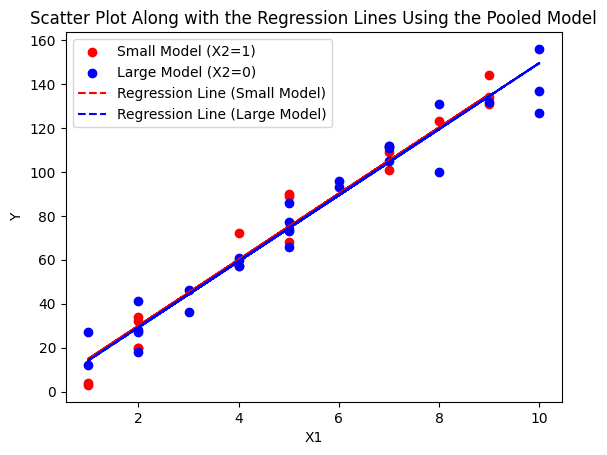

In [7]:
Y_hat_pooled_smalls = -0.92247292 + 15.04614352 * X_smalls + 0.7587218 * 1  # X_2 = 1
Y_hat_pooled_bigs = -0.92247292 + 15.04614352 * X_bigs + 0.7587218 * 0   # X_2 = 0

# Plot scatter plot
plt.scatter(X_smalls, Y_smalls, color='red', label='Small Model (X2=1)')
plt.scatter(X_bigs, Y_bigs, color='blue', label='Large Model (X2=0)')

# Plot regression lines for small and large models
plt.plot(X_smalls, Y_hat_pooled_smalls, color='red', linestyle='--', label='Regression Line (Small Model)')
plt.plot(X_bigs, Y_hat_pooled_bigs, color='blue', linestyle='--', label='Regression Line (Large Model)')

plt.xlabel('X1')
plt.ylabel('Y')
plt.legend()
plt.title('Scatter Plot Along with the Regression Lines Using the Pooled Model')

# Show the plot
plt.show()

For the seperate models, we plot the data points $(X_{smalls}, Y_{smalls})$ and $(X_{bigs}, Y_{bigs})$, and add the regression lines passing through these points.

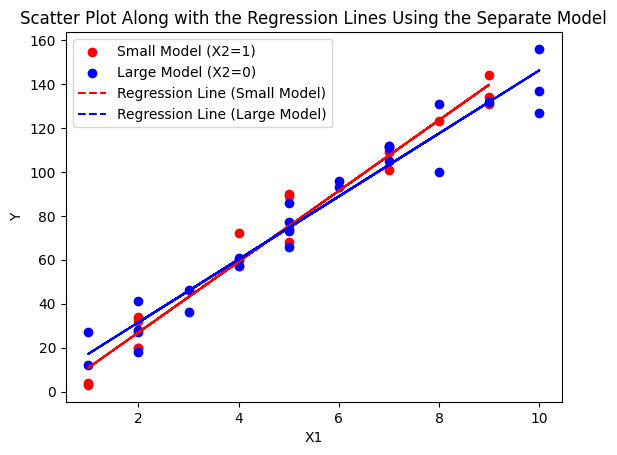

In [6]:
plt.scatter(X_smalls, Y_smalls, color='red', label='Small Model (X2=1)')
plt.scatter(X_bigs, Y_bigs, color='blue', label='Large Model (X2=0)')

plt.plot(X_smalls, Y_hat_smalls, color='red', linestyle='--', label='Regression Line (Small Model)')
plt.plot(X_bigs, Y_hat_bigs, color='blue', linestyle='--', label='Regression Line (Large Model)')

plt.xlabel('X1')
plt.ylabel('Y')
plt.legend()
plt.title('Scatter Plot Along with the Regression Lines Using the Separate Model')

plt.show()

The pooled model offers a simpler, generalized view of the data, while separate models offer detailed, precise insights.

$\textbf{Part 4.}$ $\hspace{2mm}$  Obtain the residuals from Part 1 and plot them against $x_1x_2$. Is there any indication that an interaction term in the regression model would be helpful?


$\textbf{Answer:}$ $\hspace{2mm}$ We have already calculated $\hat{Y}$ in Part 1. We calculate the residual vector $e = Y-\hat{Y}$. Then, the vector of $x_1x_2$'s is obtained, and the plot of residuals against $x_1x_2$'s is produced.

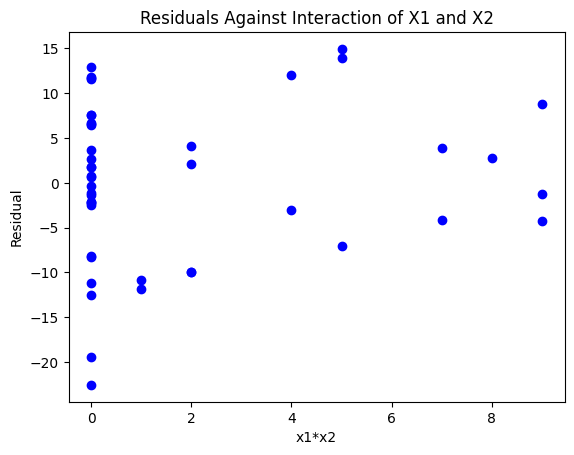

In [9]:
e = Y-Y_hat
X1_times_X2 = np.multiply(X1, X2)

plt.plot(X1_times_X2, e, 'o', color='blue', label="bigs")
plt.xlabel("x1*x2")
plt.ylabel("Residual")
plt.title("Residuals Against Interaction of X1 and X2")
plt.show()

We observe a linear pattern in the residuals at $X_1 \times X_2 = 0$. There might be a relationship between the response variable and the interaction of $X_1$ and $X_2$ that the model is not capturing. Adding an interaction term to the model can be helpful.

$\textbf{Part 5.}$ $\hspace{2mm}$  Fit the regression model $$y_i= \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_{12} x_{i1} x_{i2} + \epsilon_i$$ and provide the estimated regression function.


$\textbf{Answer:}$ $\hspace{2mm}$ We fit the regression model.

In [10]:
n = len(Y)
X_design = np.column_stack((np.ones(n),X1, X2, X1_times_X2))
H_interaction = X_design @ np.linalg.pinv(X_design.T @ X_design) @ X_design.T 
Y_hat_interaction = H_interaction @ Y

beta_hat_interaction = (np.linalg.pinv(X_design.T @ X_design) @ X_design.T) @ Y_hat_interaction
beta_hat_interaction

array([ 2.8131136 , 14.33941094, -8.14119759,  1.77738696])

The estimated regression function is $$ \hat{Y} = 2.8131136 + 14.33941094 X_1 - 8.14119759 X_2 + 1.77738696 X_1 X_2.$$

$\textbf{Part 6.}$ $\hspace{2mm}$ Based on Part 5, test whether the interaction term can be dropped from the model: let the significance level $\alpha = 10$%,  state the null, alternative hypotheses, the decision rule and your conclusion. What is the P-value of the test? If the interaction term cannot be dropped from the model, describe the nature of the interaction effect.


$\textbf{Answer:}$ $\hspace{2mm}$ We need to test whether or not $\beta_{12} = 0$. The null and alternative hypotheses are $$H_0: \beta_{12} = 0$$ $$H_A: \beta_{12} \neq 0.$$

The null hypothesis $H_0: \beta_{12} = 0$ means that there is no statistically significant relationship between the interaction term and the response variable.

The alternative hypothesis $H_A: \beta_{12} \neq 0.$ means that there is a statistically significant relationship between the interaction term and response variable.

Remember that the general formula of F-statistic is $$F^\star=\frac{SSE(R)-SSE(F)}{df_R - df_F} \bigg/ \frac{SSE(F)}{df_F} \thicksim F(p-q, n-p-1),$$


where $df_F=n-p-1$ and $df_R=n-q-1$. For the full model given above, we have $p=3$ and $q = 2$. Then, $$F^\star = \frac{SSE(R) -SSE(F)}{1} \bigg/ \frac{SSE(F)}{n-4} \thicksim F(1, n-4).$$


The reduced model is $$ \hat{Y} = 2.8131136 + 14.33941094 X_1 - 8.14119759 X_2.$$

We calculate $SSE(F)$ and $SSE(R)$ below.

In [11]:
residuals_interaction = Y_hat_interaction - Y
SSE_interaction = np.sum(np.multiply(residuals_interaction, residuals_interaction))

Y_hat_interaction_reduced = 2.8131136 + 14.33941094 * X1 - 8.14119759 * X2
residuals_interaction_reduced = Y_hat_interaction_reduced - Y

SSE_interaction_reduced = np.sum(np.multiply(residuals_interaction_reduced, residuals_interaction_reduced))

We calculate $F^{\star}$ and $p_{value}$ now.  If $p_{value} < \alpha$, then the hypothesis is rejected.

In [12]:
import scipy.stats

n = len(Y)

F_statistic = (SSE_interaction_reduced - SSE_interaction) / (SSE_interaction / (n-4))
alpha = 0.1
p_value = scipy.stats.f.cdf(F_statistic, 1, n-4)

print("F_statistic:", F_statistic)
print("p-value:", p_value)
print("alpha:", alpha)

if (p_value < alpha):
    print('Null hypothesis is rejected.')
else:
    print('failed to reject the null hypothesis.')

F_statistic: 21.76216524978089
p-value: 0.9999672811548369
alpha: 0.1
failed to reject the null hypothesis.


 Since the $p-value$ is much higher than the alpha level, we fail to reject the null hypothesis.  

 The data does not provide sufficient evidence to support the presence of an interaction effect between the variables at the chosen significance level.